### Importing
#### Importing Libraries

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from IPython.display import HTML
import seaborn as sns
from matplotlib.animation import FuncAnimation
import psutil
import gc
import pandas as pd
from tqdm import tqdm
import re
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function to print bold text
def bold(text):
    return f"\033[1m{text}\033[0m"
    
# It will fix the file path to the correct path
# def clearFilePath(path):
#     file_name = re.sub(".*" + "/oasis2/", '', path)
#     file_name = re.sub('/', '_', file_name)
#     file_name = re.sub('mpr-', '', file_name)
#     file_name = re.sub('.nifti.img', '', file_name)
#     return file_name
def clearFilePath(path):
    file_name = path.split('\\')[-2:]
    return file_name[0]+'_'+file_name[1].split('-')[-1][0]

### Load Data
#### Importing excel data

In [3]:
df_demographics_input = pd.read_excel('oasis_longitudinal_demographics.xlsx') 
df_demographics_input

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
1,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
2,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1703.590000,0.710542,1.030180
370,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1332.944463,0.801248,1.316634
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [4]:
len(df_demographics_input['Subject ID'].unique())

150

In [5]:
# Check for null values
null_values = df_demographics_input.isnull()

# Display the DataFrame with null values highlighted
print(null_values)

     Subject ID  MRI ID  Group  Visit  MR Delay    M/F   Hand    Age   EDUC  \
0         False   False  False  False     False  False  False  False  False   
1         False   False  False  False     False  False  False  False  False   
2         False   False  False  False     False  False  False  False  False   
3         False   False  False  False     False  False  False  False  False   
4         False   False  False  False     False  False  False  False  False   
..          ...     ...    ...    ...       ...    ...    ...    ...    ...   
368       False   False  False  False     False  False  False  False  False   
369       False   False  False  False     False  False  False  False  False   
370       False   False  False  False     False  False  False  False  False   
371       False   False  False  False     False  False  False  False  False   
372       False   False  False  False     False  False  False  False  False   

       SES   MMSE    CDR   eTIV   nWBV    ASF  
0  

In [6]:
df_demographics_input.to_excel('null.xlsx')

In [7]:
df_preprocessed = df_demographics_input.dropna()

In [8]:
len(df_preprocessed['Subject ID'].unique())

142

In [9]:
df_preprocessed = df_preprocessed.rename(columns={"M/F": "is_male", "Hand": "right_handed"})
df_preprocessed = df_preprocessed.replace({"is_male": {'M' : 1, 'F' : 0}})
df_preprocessed = df_preprocessed.replace({"right_handed": {'R' : 1, 'L' : 0}})
df_preprocessed

C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\3527641784.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_preprocessed = df_preprocessed.replace({"is_male": {'M' : 1, 'F' : 0}})
C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\3527641784.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_preprocessed = df_preprocessed.replace({"right_handed": {'R' : 1, 'L' : 0}})


,Subject ID,MRI ID,Group,Visit,MR Delay,is_male,right_handed,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,1,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
1,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,1,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
5,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,0,1,90,18,3.0,27.0,0.0,1200.100000,0.718214,1.462380
6,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,0,1,88,18,3.0,28.0,0.0,1215.330000,0.709512,1.444060
7,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,1,1,83,12,4.0,29.0,0.5,1700.723122,0.711054,1.031914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,1,1,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,OAS2_0185,OAS2_0185_MR1,Demented,1,0,1,1,80,16,1.0,28.0,0.5,1703.590000,0.710542,1.030180
370,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,0,1,65,13,2.0,30.0,0.0,1332.944463,0.801248,1.316634
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,0,1,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


### PCA

In [10]:
# pca_features = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

In [11]:
# df_preprocessed = df_preprocessed.replace({"Group": {'Nondemented' : 0, 'Converted' : 1, 'Demented' : 2}})
# df_preprocessed

In [12]:
# from sklearn.decomposition import PCA

# X = df_preprocessed[pca_features]
# y = df_preprocessed['Group']
   
# pca = PCA()
# x_new = pca.fit_transform(X)

# def myplot(score,coeff, orig_feat=None):
#     xs = score[:,0]
#     ys = score[:,1]
#     n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     scatter = plt.scatter(xs * scalex,ys * scaley, c = y, s = 10)
#     labels = np.unique(y)
#     handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
#     labels = ['Non-Demented', 'Converted', 'Demented']
#     plt.legend(handles, labels)
#     s = .63
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0]*s, coeff[i,1]*s,color = 'r',alpha = 0.5)
#         if orig_feat is None:
#             plt.text(coeff[i,0] * 1.15 * s, coeff[i,1] * 1.15 * s, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0] * 1.15 * s, coeff[i,1] * 1.15 * s, orig_feat[i], color = 'g', ha = 'center', va = 'center', fontsize=8)
#     plt.xlim(-.3,.65)
#     plt.ylim(-.5,.65)
#     plt.xlabel("PC{}".format(1), fontsize=8)
#     plt.ylabel("PC{}".format(2), fontsize=8)
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)
#     plt.grid()

# #Call the function. Use only the 2 PCs.
# myplot(score=x_new[:,0:2],coeff=np.transpose(pca.components_[0:2, :]),orig_feat=pca_features)
# plt.show()

In [13]:
len(df_demographics_input[df_demographics_input['Group'] != 'Converted'])

336

### Processing image data.
This code is responsible for loading MRI "nifti.img" files from a specified directory, processing the data, and cleaning the data based on none values in the demographics.
It utilizes the `nibabel` library to load the MRI files and extract relevant information.

In [14]:

rootdir = '../code/OASIS2'


mri_patients_scans_name = []
mri_ignored_file_names = []
mri_images = []
mri_images_data = []

# Count the total number of files in the root directory
file_count = sum(len(files) for _, _, files in os.walk(rootdir))

print(f'Found {file_count} files in "{rootdir}" subdirectories\n')
print('Loading MRI "nifti.img" files:')

# Display a progress bar using tqdm
with tqdm(total=file_count) as pbar:
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            filepath = os.path.join(subdir, file)

            if filepath.endswith("nifti.img"):
                try:
                    # Load the MRI image using nibabel
                    img = nib.load(filepath)
                    mri_images.append(img)
                    mri_patients_scans_name.append(clearFilePath(filepath))
                    mri_images_data.append(img.get_fdata())
                except nib.filebasedimages.ImageFileError as e:
                    # If the file type is not recognized, ignore the file and print a message
                    mri_ignored_file_names.append(filepath)
                    print(
                        f'File type not recognized - ignoring "{filepath}" file')

            pbar.update(1)

print(
    f'\nFound and loaded {len(mri_patients_scans_name)} MRI "nifti.img" files from "{rootdir}" subdirectories')
print(f'Ignored:')
print(*mri_ignored_file_names, sep=' ')

# Get unique patient visit names from MRI file names
mri_patients_visits_names = np.unique(
    [re.sub('_\d\Z', '', i) for i in mri_patients_scans_name])

# Filter the demographics dataframe based on the MRI IDs
df_demographics = df_demographics_input[df_demographics_input['MRI ID'].isin(
    mri_patients_visits_names)]

print("Before cleaning data from none values from demographics:")
print(
    f'Number of patients visits: {len(np.unique(mri_patients_visits_names))}')
print(f'Number of patients scans: {len(mri_patients_scans_name)}')
print(
    f'Number of slices of MRI scans (unique values): {np.unique([arr.shape[2] for arr in mri_images_data])}')

# Drop rows in demographics dataframe with None values
df_drop = df_demographics[df_demographics.isna().any(axis=1)]
list_drop = df_drop['MRI ID'].tolist()
print(
    f'None value rows in demographics data to drop: {df_demographics.isnull().any(axis=1).sum()}')
df_demographics = df_demographics.dropna().reset_index(drop=True)

# Remove corresponding MRI files and names based on dropped rows
fname_drop = [fname for fname in mri_patients_scans_name if re.sub(
    '_\d\Z', '', fname) in list_drop]
fname_drop_id = [i for i in range(
    len(mri_patients_scans_name)) if mri_patients_scans_name[i] in fname_drop]

for i in reversed(fname_drop_id):
    del mri_images[i]
    del mri_patients_scans_name[i]
    del mri_images_data[i]

print(f"After cleaning data from none values from demographics:")
print(f"Number of removed MRI files: {len(fname_drop)}")
print(
    f"Number of patients visits: {len(np.unique(mri_patients_visits_names))}")
print(f"Number of patients scans: {len(mri_patients_scans_name)}")


<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:65: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:65: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\1178132981.py:43: SyntaxWarning: invalid escape sequence '\d'
  [re.sub('_\d\Z', '', i) for i in mri_patients_scans_name])
C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\1178132981.py:65: SyntaxWarning: invalid escape sequence '\d'
  '_\d\Z', '', fname) in list_drop]


Found 787 files in "../code/OASIS2" subdirectories

Loading MRI "nifti.img" files:


  0%|          | 3/787 [00:00<00:29, 26.94it/s]

File type not recognized - ignoring "../code/OASIS2\OAS2_0004_MR2\mpr-1.nifti.img" file


100%|██████████| 787/787 [00:52<00:00, 14.97it/s]



Found and loaded 220 MRI "nifti.img" files from "../code/OASIS2" subdirectories
Ignored:
../code/OASIS2\OAS2_0004_MR2\mpr-1.nifti.img
Before cleaning data from none values from demographics:
Number of patients visits: 60
Number of patients scans: 220
Number of slices of MRI scans (unique values): [128]
None value rows in demographics data to drop: 3
After cleaning data from none values from demographics:
Number of removed MRI files: 11
Number of patients visits: 60
Number of patients scans: 209


#### Visualizing MRI Data
This code segment performs visualizations of MRI slices using the matplotlib.pyplot library. It demonstrates the visualization of different slices from an MRI image.

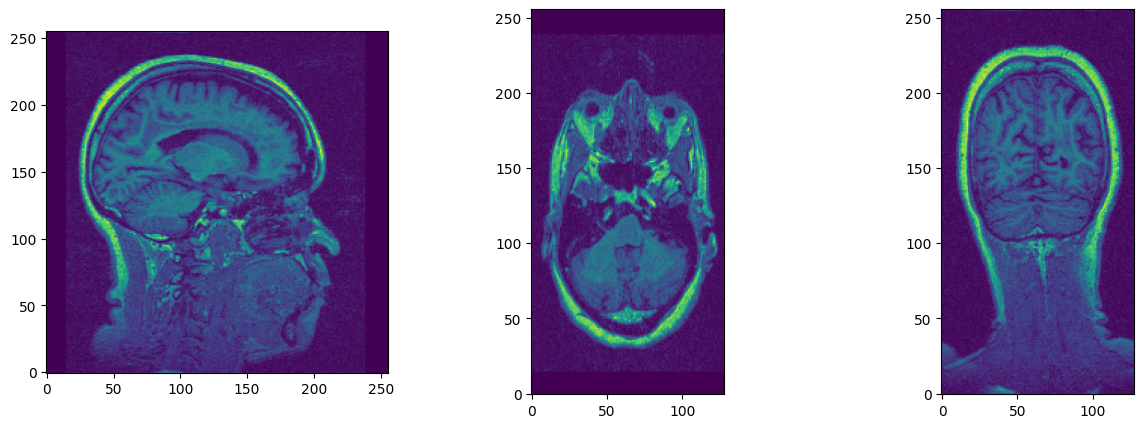

In [15]:
i = np.transpose(mri_images_data[0], (1, 0, 2, 3))
# Transpose the MRI image data to rearrange the dimensions for visualization

plt.figure(figsize=(15, 5))
# Create a figure with a size of 15x5 inches

plt.subplot(131)
# Define the first subplot in a 1x3 grid

plt.imshow(np.transpose(
    mri_images_data[0][:, :, 75], (1, 0, 2)), origin='lower')
# Display the transposed MRI image slice at index 75
# Adjust the dimensions for proper display using np.transpose()
# Set the origin of the image to the lower-left corner

plt.subplot(132)
# Define the second subplot in the grid

plt.imshow(i[120, :, :], origin='lower')
# Display a different slice of the transposed MRI image (at index 120)

plt.subplot(133)
# Define the third subplot in the grid

plt.imshow(i[:, 70, :], origin='lower')
# Display another slice of the transposed MRI image (at index 70)

plt.show()
# Show the figure with the three subplots and MRI slice visualizations


<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\2368456788.py:20: SyntaxWarning: invalid escape sequence '\d'
  '_\d\Z', '', mri_file_name)]
C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\2368456788.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'MRI ID: {patient_id[0]} - visit: {patient_id[1]} - scan: {patient_id[2]}\nGroup: {patient_data.iloc[0][2]}\nSlice {s}')


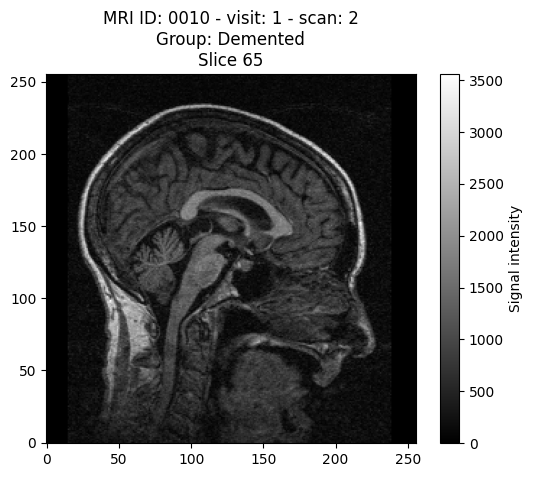

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
9,OAS2_0010,OAS2_0010_MR1,Demented,1,0,F,R,66,12,3.0,30.0,0.5,1446.66,0.768708,1.21314


In [16]:
image, s = 30, 65
# Define the image and slice indices to visualize

img_data = mri_images_data[image]
# Retrieve the MRI image data for the specified image index

img_data = np.transpose(img_data, (1, 0, 2, 3))
# Transpose the MRI image data to rearrange the dimensions for visualization

mid_slice_x = img_data[:, :, s]
# Extract the slice at index 's' from the transposed MRI image data

mri_file_name = mri_patients_scans_name[image]
# Retrieve the MRI file name corresponding to the specified image index

patient_id = list(filter(None, re.split('_|MR', mri_file_name)))[1:]
# Extract the patient ID from the MRI file name using regex

patient_data = df_demographics[df_demographics['MRI ID'] == re.sub(
    '_\d\Z', '', mri_file_name)]
# Retrieve the demographics data for the patient ID obtained from the MRI file name

plt.title(
    f'MRI ID: {patient_id[0]} - visit: {patient_id[1]} - scan: {patient_id[2]}\nGroup: {patient_data.iloc[0][2]}\nSlice {s}')
# Set the title of the plot with relevant information, such as MRI ID, visit, scan, group, and slice index

plt.imshow(mid_slice_x, cmap='gray', origin='lower')
# Display the extracted MRI slice using a grayscale colormap and with the origin set to the lower-left corner

plt.colorbar(label='Signal intensity')
# Add a colorbar to the plot with the label 'Signal intensity'

plt.show()
# Show the plot with the MRI slice visualization

patient_data
# Display the demographics data for the corresponding patient ID


C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\3675910927.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'MRI ID: {patient_id[0]} - visit: {patient_id[1]} - scan: {patient_id[2]}\nGroup: {patient_data.iloc[0][2]}\nSlices: {slice_no}', fontsize=15)


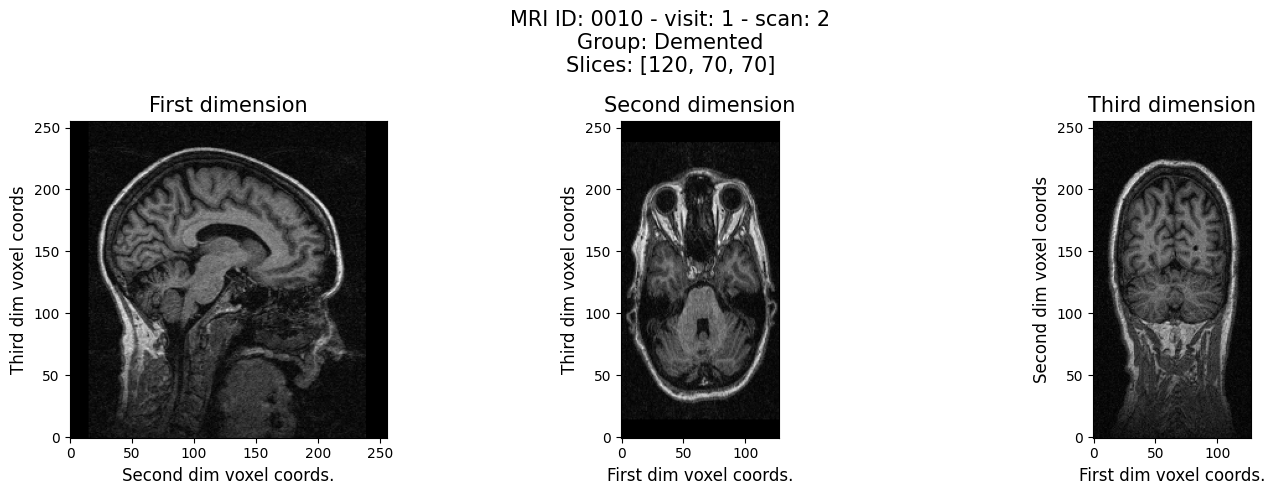

In [17]:
slice_no = [120, 70, 70]
# Define the slice numbers to visualize in each dimension

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
# Create a figure with three subplots arranged in a single row

ax[0].imshow(img_data[:, :, slice_no[2]], origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension', fontsize=15)
# Display the slice along the first dimension in the first subplot
# Set the x-axis and y-axis labels
# Set the title for the subplot indicating the dimension

ax[1].imshow(img_data[slice_no[0], :, :], origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title(f'Second dimension', fontsize=15)
# Display the slice along the second dimension in the second subplot
# Set the x-axis and y-axis labels
# Set the title for the subplot indicating the dimension

ax[2].imshow(img_data[:, slice_no[1], :], origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title(f'Third dimension', fontsize=15)
# Display the slice along the third dimension in the third subplot
# Set the x-axis and y-axis labels
# Set the title for the subplot indicating the dimension

fig.suptitle(
    f'MRI ID: {patient_id[0]} - visit: {patient_id[1]} - scan: {patient_id[2]}\nGroup: {patient_data.iloc[0][2]}\nSlices: {slice_no}', fontsize=15)
# Set the super-title of the figure with relevant information, such as MRI ID, visit, scan, group, and the selected slice numbers

fig.tight_layout()
# Adjust the subplots layout to prevent overlapping


Text(0.5, 1.0, 'eTIV vs Age')

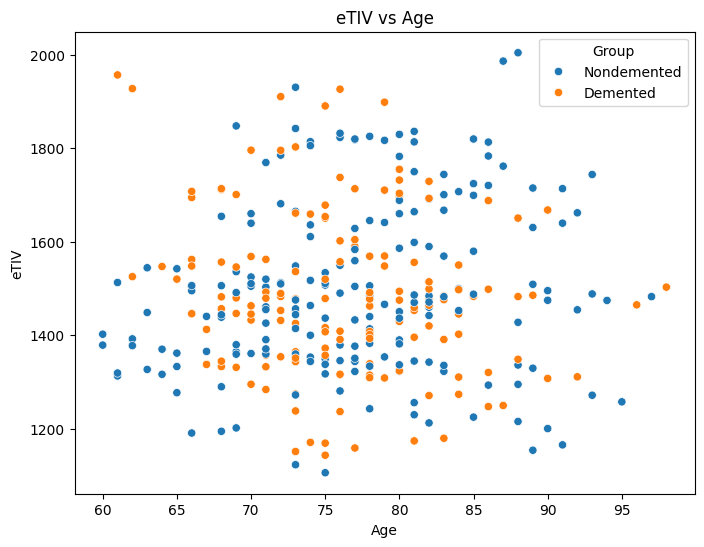

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_demographics_input[df_demographics_input['Group']
                != 'Converted'], y='eTIV', x='Age', hue='Group')
plt.title("eTIV vs Age")

Text(0.5, 1.0, 'nWBV vs Age')

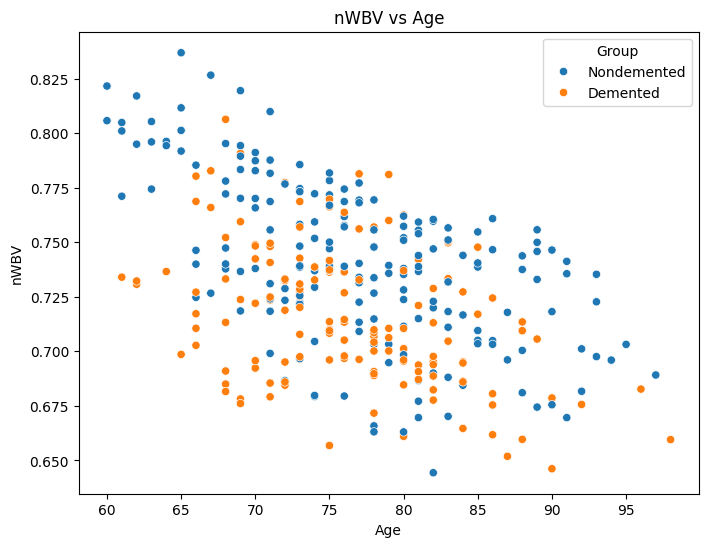

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_demographics_input[df_demographics_input['Group']
                != 'Converted'], y='nWBV', x='Age', hue='Group')
plt.title("nWBV vs Age")

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_demographics_input['Group'])

In [21]:
mri_images_data[0].shape

(256, 256, 128, 1)

In [22]:
# Retrieve the patient details from the demographics data
def get_patient_detail(index): 
    mri_file_name = mri_patients_scans_name[index]
    patient_data = df_demographics_input[df_demographics_input['MRI ID'] == re.sub(
        '_\d\Z', '', mri_file_name)]
    return patient_data


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sayan\AppData\Local\Temp\ipykernel_3868\1526980968.py:5: SyntaxWarning: invalid escape sequence '\d'
  '_\d\Z', '', mri_file_name)]


### Data Preprocessing
Encoding categorical label data in data preprocessing. This code segment demonstrates the use of the LabelEncoder classes to encode categorical data. 

Also, we are selecting only three frame images from 3D image  dataset to reduce the computational time for the model training.Also VGG16 model is used for transfer learning and it only support only 3 channel images.


In [23]:
from tensorflow.keras.utils import to_categorical

cnn_y = []
# Initialize an empty list to store the labels for CNN classification

for i in range(len(mri_images_data)):
    # Iterate through each MRI image data

    # Retrieve the patient group information using the 'get_patient_detail' function
    patient_group = get_patient_detail(i)['Group'].values[0]

    # Append the patient group to the 'cnn_y' list
    cnn_y.append(patient_group)

# Initialize a label encoder object for encoding the patient groups

# Encode the patient groups using label encoding and convert them to number format
cnn_y = to_categorical(label_encoder.fit_transform(cnn_y))


In [24]:
# selects a subset of three consecutive slices (indexed 70, 71, and 72) from each MRI image in the mri_images_data array.
# It then reshapes the subset to have a consistent shape of (256, 256, 3) representing an RGB image.
# The resulting transformed data is stored in the mri_images_data_p numpy array for further processing or visualization.
mri_images_data_p = np.array(
    [i[:, :, [70, 100, 125]].reshape(256, 256, 3) for i in mri_images_data])


In [25]:
print(f"{bold('Length if image data: ')}{len(mri_images_data)}")
print(f"{bold('Length of y: ')}{len(cnn_y)}")
print(f"{bold('shape of a image: ')}{mri_images_data_p[0].shape}")


Length if image data: 209
Length of y: 209
shape of a image: (256, 256, 3)


#### Splitting data into training and test

In [26]:
from sklearn.model_selection import train_test_split

#  split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(
    mri_images_data_p, cnn_y, test_size=.25)

print(f"{bold('Train shape: ')}{train_X.shape}")
print(f"{bold('Test shape: ')}{test_X.shape}")

Train shape: (156, 256, 256, 3)
Test shape: (53, 256, 256, 3)


### Data Analysis
#### Importing pre-trained model

VGG16 is a popular convolution's neural network architecture widely used for various computer vision tasks, including image classification. ImageNet is a large-scale dataset with millions of labeled images used for training deep learning models.

In [27]:
from tensorflow.keras import applications
# VGG16 pre-trained model without fully connected layers and with different input dimensions
input_shape = (256, 256, 3)
model = applications.VGG16(
    weights="imagenet", include_top=False, input_shape=input_shape)
model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# freeze the models layers
for layer in model.layers:
    layer.trainable = False

In [29]:
# from tensorflow.keras.layers import LeakyReLU, Flatten, Dense
# from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adamax, Adagrad
# from tensorflow.keras.models import Model

# Flatten the output of the base model
# flatten = Flatten()(model.output)

# # Add a fully connected layer with 64 units
# fc1 = Dense(64, activation='sigmoid')(flatten)  # Change the activation function here

# # Apply LeakyReLU activation to introduce non-linearity
# # leaky_relu = LeakyReLU(alpha=0.1)(fc1)  # Remove this line if using a different activation function

# # Add the final output layer with 3 units and softmax activation
# output = Dense(3, activation='softmax')(fc1)  # Change the activation function here

# # Create a new model by specifying the input and output layers
# new_model = Model(inputs=model.input, outputs=output)

# # Compile the new model with optimizer, loss function, and metrics
# optimizers = SGD()
# new_model.compile(optimizer=optimizers,  # Change the optimizer here
#                   loss='categorical_crossentropy', metrics=['accuracy'])


# # Print the summary of the new model
# new_model.summary()


### Training the model

Experimenting with activation function: tanh, optimizer: SGD
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.4530 - loss: 1.3222 - val_accuracy: 0.2500 - val_loss: 1.1326
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.4147 - loss: 1.0789 - val_accuracy: 0.5000 - val_loss: 1.0252
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4398 - loss: 1.0621 - val_accuracy: 0.5000 - val_loss: 1.0065
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - accuracy: 0.4294 - loss: 1.0552 - val_accuracy: 0.5000 - val_loss: 1.0036
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.4221 - loss: 1.0696 - val_accuracy: 0.5000 - val_loss: 1.0167
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.3876 - loss: 1.0769 - val_accuracy: 0.5000 - val_loss: 1.0068
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4169 - loss: 1.0491 - val_accuracy: 0.5000 - val_loss: 1.0049
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4002 - lo

c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.3436 - loss: 1.6462 - val_accuracy: 0.5000 - val_loss: 1.4984
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.4792 - loss: 1.4270 - val_accuracy: 0.4688 - val_loss: 1.2485
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4472 - loss: 1.1938 - val_accuracy: 0.5000 - val_loss: 1.1402
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4172 - loss: 1.1625 - val_accuracy: 0.5000 - val_loss: 1.0793
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4547 - loss: 1.0789 - val_accuracy: 0.5000 - val_loss: 1.0469
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.4610 - loss: 1.0536 - val_accuracy: 0.5000 - val_loss: 1.0275
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.4916 - loss: 1.0247 - val_accuracy: 0.5000 - val_loss: 1.0215
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.5123 - loss: 1.0290 - val_accuracy: 0.5000 - val_loss: 1.0158
Epoch 9/

c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.2703 - loss: 1.7585 - val_accuracy: 0.3125 - val_loss: 1.2737
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3439 - loss: 1.3724 - val_accuracy: 0.5000 - val_loss: 1.2203
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5398 - loss: 1.2638 - val_accuracy: 0.5000 - val_loss: 1.1690
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5002 - loss: 1.1978 - val_accuracy: 0.5000 - val_loss: 1.1265
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5470 - loss: 1.1189 - val_accuracy: 0.5000 - val_loss: 1.0902
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4790 - loss: 1.1286 - val_accuracy: 0.5000 - val_loss: 1.0576
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4727 - loss: 1.0767 - val_accuracy: 0.5000 - val_loss: 1.0329
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4685 - loss: 1.0419 - val_accuracy: 0.5000 - val_loss: 1.0180
Epoch 9/

c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.3195 - loss: 1.8658 - val_accuracy: 0.3438 - val_loss: 1.8806
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.3615 - loss: 1.9522 - val_accuracy: 0.3438 - val_loss: 1.7168
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.3605 - loss: 1.7711 - val_accuracy: 0.3438 - val_loss: 1.5785
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3490 - loss: 1.6645 - val_accuracy: 0.3750 - val_loss: 1.4555
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.3450 - loss: 1.4555 - val_accuracy: 0.3750 - val_loss: 1.3651
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.4426 - loss: 1.3581 - val_accuracy: 0.5000 - val_loss: 1.2870
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.6379 - loss: 1.2889 - val_accuracy: 0.4375 - val_loss: 1.2578
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5611 - loss: 1.3532 - val_accuracy: 0.5312 - val_loss: 1.2201
Epoch 9/

c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.3387 - loss: 1.6276 - val_accuracy: 0.4688 - val_loss: 1.1413
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4900 - loss: 1.1132 - val_accuracy: 0.4375 - val_loss: 1.1342
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5415 - loss: 1.1136 - val_accuracy: 0.4688 - val_loss: 1.1914
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4456 - loss: 1.2598 - val_accuracy: 0.5000 - val_loss: 1.1430
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4706 - loss: 1.1555 - val_accuracy: 0.4688 - val_loss: 1.1248
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4572 - loss: 1.1777 - val_accuracy: 0.5000 - val_loss: 1.1177
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4697 - loss: 1.1419 - val_accuracy: 0.5000 - val_loss: 1.1044
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4625 - loss: 1.1449 - val_accuracy: 0.4688 - val_loss: 1.0974
Epoch 9/

c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

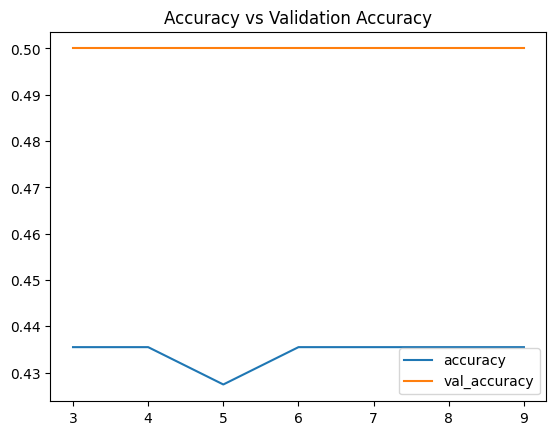

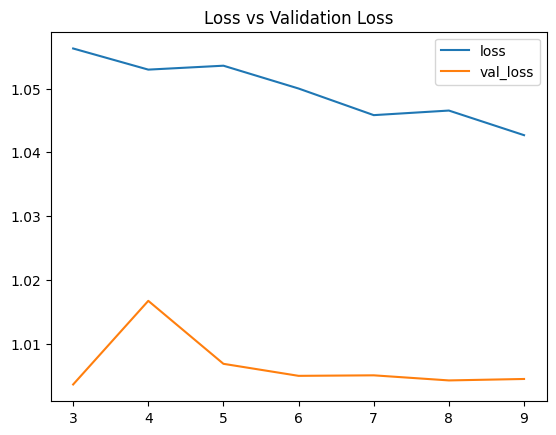

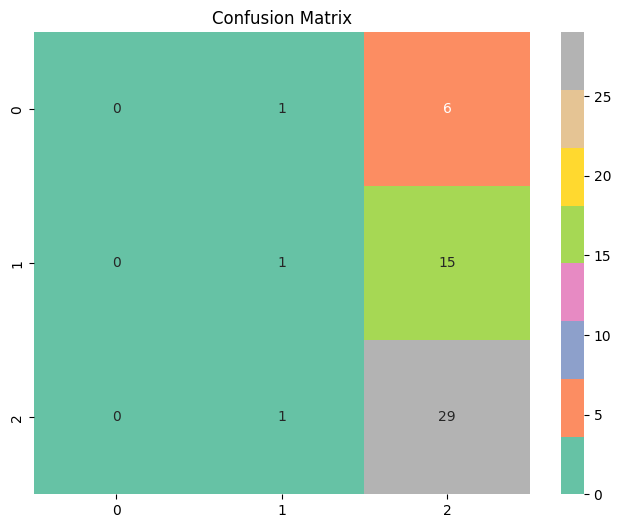

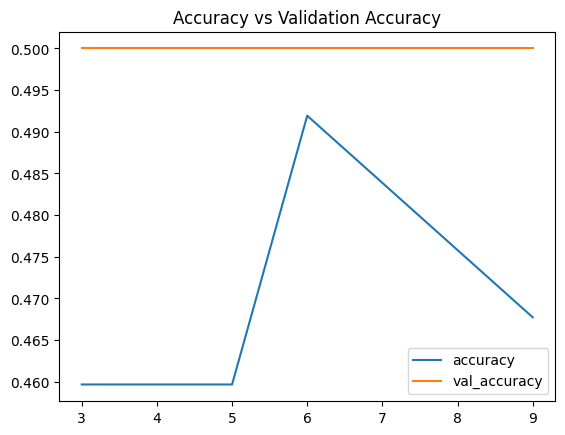

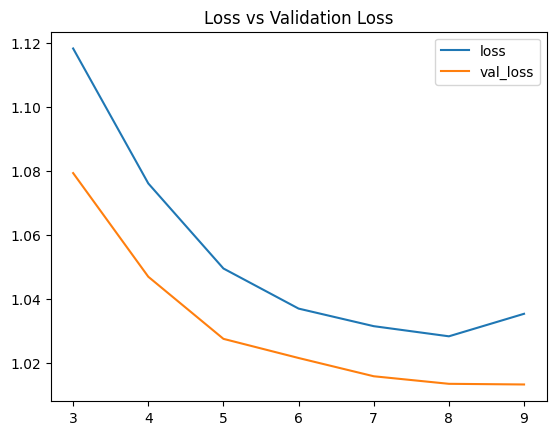

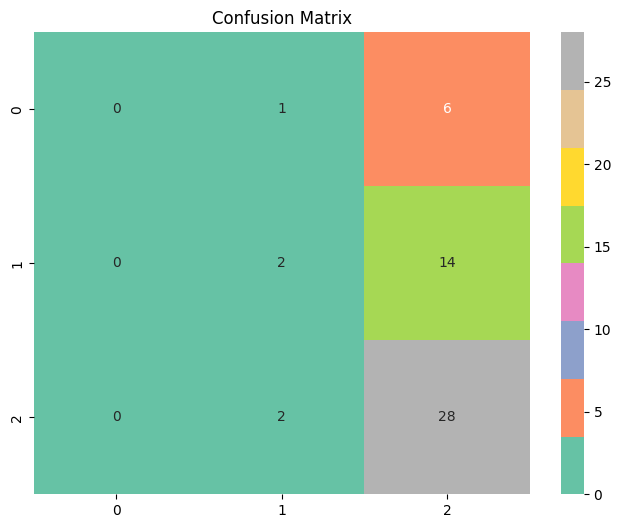

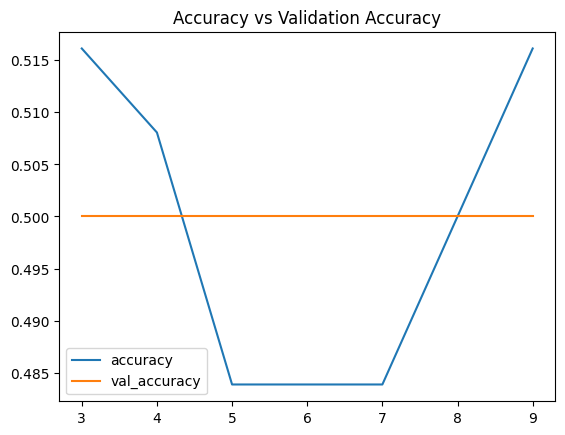

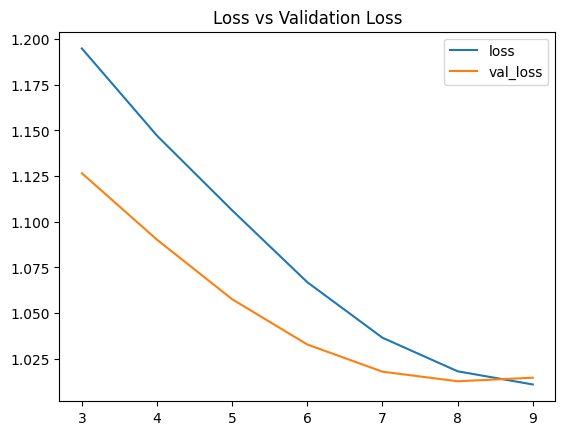

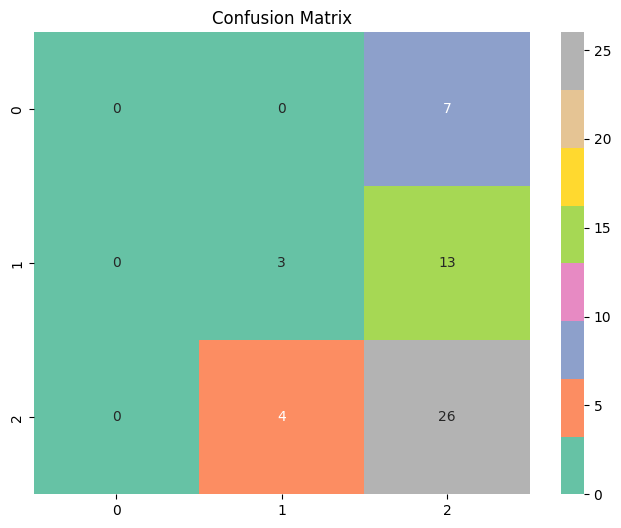

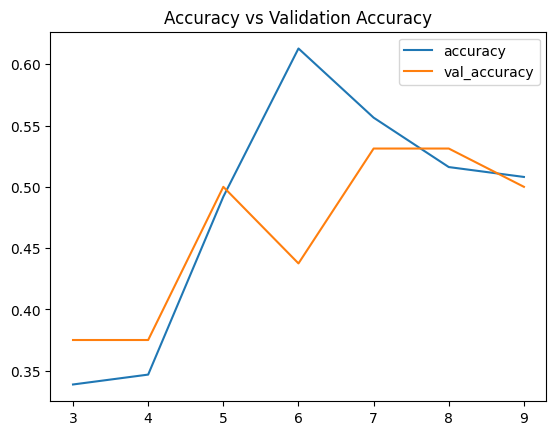

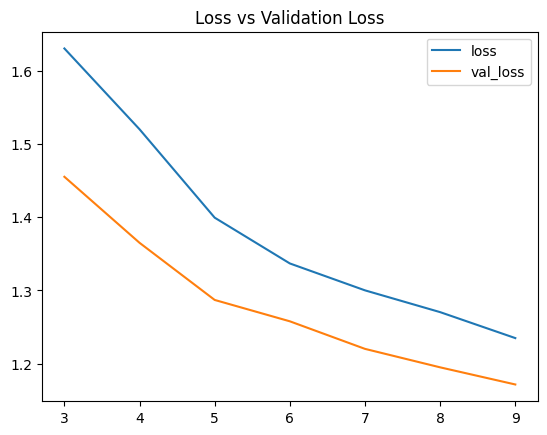

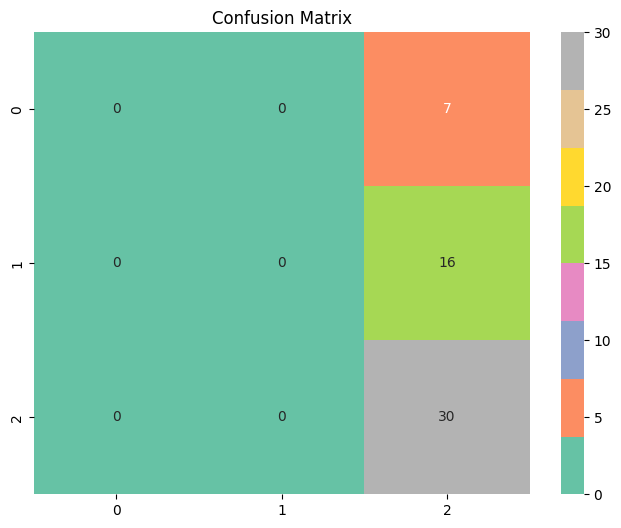

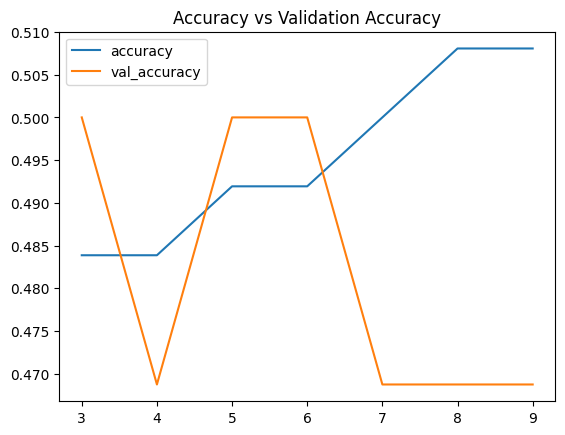

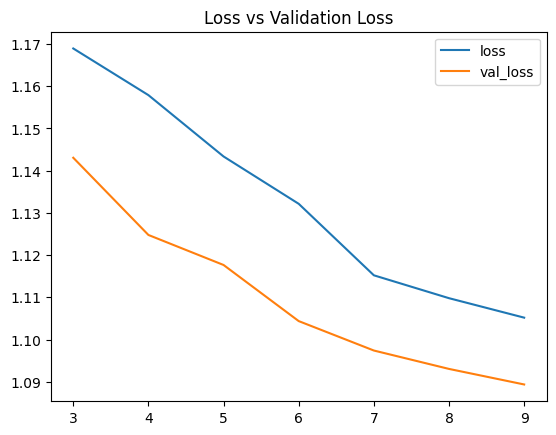

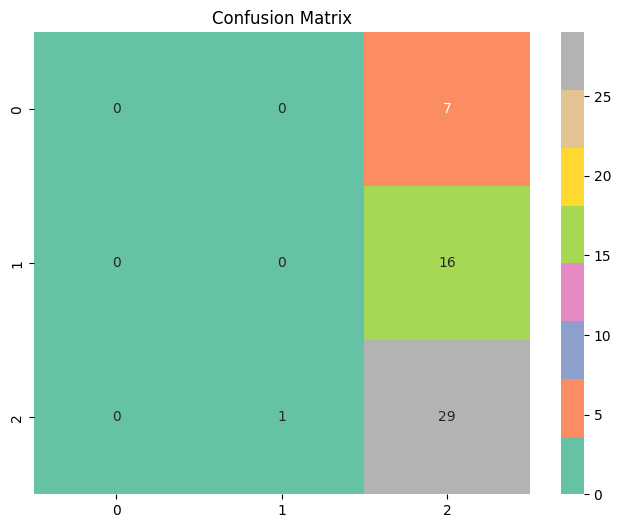

In [30]:
from tensorflow.keras.layers import LeakyReLU, Flatten, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adamax, Adagrad
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

# Define the activation functions you want to experiment with
activation_functions = ['tanh', 'tanh', 'tanh', 'tanh', 'tanh']

# Define the optimizers you want to experiment with
optimizers = [SGD(), RMSprop(), Adam(), Adamax(), Adagrad()]

# Flatten the output of the base model
flatten = Flatten()(model.output)

for activation, optimizer in zip(activation_functions, optimizers):
    print(f"Experimenting with activation function: {activation}, optimizer: {optimizer.__class__.__name__}")

    # Replace LeakyReLU with the desired activation function
    if activation != 'leaky_relu':
        fc1 = Dense(64, activation=activation)(flatten)
    else:
        fc1 = Dense(64)(flatten)
        fc1 = LeakyReLU(alpha=0.1)(fc1)

    output = Dense(3, activation='softmax')(fc1)

    new_model = Model(inputs=model.input, outputs=output)

    new_model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with early stopping
    # Define an early stopping callback with a patience of 6 epochs
    early_stopping = EarlyStopping(patience=6)
    hist = new_model.fit(train_X, train_y, validation_split=.2,
                         epochs=10, callbacks=[early_stopping])
    
    #  Plot the training and validation accuracy/loss over time
    pd.DataFrame(hist.history).iloc[3:, [0, 2]].plot(
    title="Accuracy vs Validation Accuracy")
    pd.DataFrame(hist.history).iloc[3:, [1, 3]].plot(
    title="Loss vs Validation Loss")

    # Evaluate model
    y_pred = np.argmax(new_model.predict(test_X), axis=1)

    print(f"{bold('Accuracy Score: ')}{accuracy_score(np.argmax(test_y,axis=1),y_pred)}\n")
    print(f"{bold('Classification report')}{classification_report(np.argmax(test_y,axis=1),y_pred)}\n")
    print(f"{bold('F1 Score: ')}{f1_score(np.argmax(test_y,axis=1),y_pred, average=None)}\n")

    # Confusion matrix plot
    plt.figure(figsize=(8, 6))

    # Compute the confusion matrix
    c_m = confusion_matrix(np.argmax(test_y, axis=1), y_pred)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(c_m, annot=True,cmap='Set2')
    plt.title("Confusion Matrix")

In [31]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define an early stopping callback with a patience of 6 epochs
# early_stopping = EarlyStopping(patience=6)

# # Train the new model with early stopping
# hist = new_model.fit(train_X, train_y, validation_split=.2,
#                      epochs=10, callbacks=[early_stopping])


#### Visualization of accuracy and validation loss of the model while training

In [32]:
# pd.DataFrame(hist.history).iloc[3:, [0, 2]].plot(
#     title="Accuracy vs Validation Accuracy")
# pd.DataFrame(hist.history).iloc[3:, [1, 3]].plot(
#     title="Loss vs Validation Loss")

#### Prediction

In [33]:
# predictions on x_test dataset
# y_pred = np.argmax(new_model.predict(test_X), axis=1)

#### Metrics
- accuracy score
- F1 score
- confusion matrix
- classification report

In [34]:
# print(f"{bold('Accuracy Score: ')}{accuracy_score(np.argmax(test_y,axis=1),y_pred)}\n")
# print(f"{bold('Classification report')}{classification_report(np.argmax(test_y,axis=1),y_pred)}\n")
# print(f"{bold('F1 Score: ')}{f1_score(np.argmax(test_y,axis=1),y_pred, average=None)}\n")

In [35]:
# # Cconfusion matrix plot
# plt.figure(figsize=(8, 6))

# # Compute the confusion matrix
# c_m = confusion_matrix(np.argmax(test_y, axis=1), y_pred)

# # Plot the confusion matrix as a heatmap
# sns.heatmap(c_m, annot=True,cmap='Set2')
# plt.title("Confusion Matrix")

In [36]:
# # Plot the 4 images from the test dataset after prediction with its actual and predicted labels

# images = [1, 27, 35, 49]
# plt.figure(figsize=(16, 12))

# for index, image in enumerate(images):
#     img_data = test_X[image]

#     mri_file_name = mri_patients_scans_name[image]
#     true = label_encoder.classes_[np.argmax(test_y, axis=1)[image]]
#     actual = label_encoder.classes_[y_pred[image]]

#     plt.subplot(2, 2, index+1)
#     plt.title(f'\nGroup: {true}\nPredicted: {actual}')
#     plt.imshow(img_data[:, :, -1], cmap='gray', origin='lower')
#     plt.xlabel('First axis')
#     plt.ylabel('Second axis')
#     plt.colorbar(label='Signal intensity')
# plt.show()

### Post Analysis 
Saving the model weights 

In [37]:
# new_model.save("OASIS2_MODEL_1.h5")